# Practico 5 (parte 5)

## Entrenar word embeddings

## Importación de módulos y librerías

In [1]:
# Inclusion de librerias y módulos
import os
import logging
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Algunas utilidades
from utiles import bcolors

# Importamos wrod2vec de la lib gensim
from gensim.models import Word2Vec

# Importamos PCA de sklear
from sklearn.decomposition import PCA

# Importamos logger para tener informacion de estado
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

plt.style.use('seaborn')
np.random.seed(42)
Nsamples = 200

In [2]:
positives = ['great', 'excellent', 'nice', 'awesome', 'amazing', 'fantastic', 'wonderful', 'perfect', 'nailed', 'brilliant', 'lovely', 'superb', 'beautiful','yupppppp']
emojis = [':grinning_face_with_smiling_eyes:', ':smiling_face_with_smiling_eyes:', ':face_with_tears_of_joy:', ':grinning_face:', ':smiling_face_with_sunglasses:',':smiling_face_with_open_mouth_&_smiling_eyes:']

2020-10-08 14:33:14,569 : INFO : loading Word2Vec object from ./20201008-140336_model_100-5-1-0.bin
2020-10-08 14:33:15,622 : INFO : loading wv recursively from ./20201008-140336_model_100-5-1-0.bin.wv.* with mmap=None
2020-10-08 14:33:15,623 : INFO : setting ignored attribute vectors_norm to None
2020-10-08 14:33:15,624 : INFO : loading vocabulary recursively from ./20201008-140336_model_100-5-1-0.bin.vocabulary.* with mmap=None
2020-10-08 14:33:15,625 : INFO : loading trainables recursively from ./20201008-140336_model_100-5-1-0.bin.trainables.* with mmap=None
2020-10-08 14:33:15,626 : INFO : setting ignored attribute cum_table to None
2020-10-08 14:33:15,628 : INFO : loaded ./20201008-140336_model_100-5-1-0.bin
<ipython-input-3-fbd8d2cc3c13>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


20201008-140336_model_100-5-1-0.bin - Tamaño del vocabulario 91791
Primeras 50 compoentes del vocabulario
['<url>', 'hey', 'robert', '!', 'welcome', 'yup', '', 'looking', 'problem', "'ve", 'reviewed', 'finding', 'domain', 'square', 'root', 'function', 'let', "'s", 'work', 'together', 'find', 'exactly', "'re", 'stuck', 'tried', '?', 'simplifying', 'wrong', 'okay', 'actually', 'need', 'simplify', 'however', 'would', "n't", 'please', 'show', 'check', '2x√-x+7', 'appreciate', 'seem', 'relevant', 'discuss', 'move', 'tell', 'mean', 'word', '"', 'meant', 'learned']
Ultimas 50 compoentes del vocabulario
['x/-4', 'x/-4>8', '880÷.20', '80÷20=40', 'johnathon', '3÷6=2', '2but', 'hermela', '738', 'karia', '800+.2', 'antonniets', 'utillities', 'bill(which', '.1×5', 'questoin', 'dook', '37.5×.1=', 'netpay', 'pay(880', '44is', '3,75', '47.75', '×3', '143.25', 'naything', 'z+1)^2', 'z+1)(z+1', '2z+1', '16z+8', '8z+12', '8z+6', '2z+3', '2*x+0', '2(0)+(0)-3(0)+4', '-j-6', '-3j+4', 'upyo', '-4x-16', 'y>7'

<ipython-input-3-fbd8d2cc3c13>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  Xp = model[positives]
<ipython-input-3-fbd8d2cc3c13>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  Xe = model[emojis]
/Users/pgianni/venv/diplo/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8736 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pgianni/venv/diplo/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8736 missing from current font.
  font.set_text(s, 0, flags=flags)


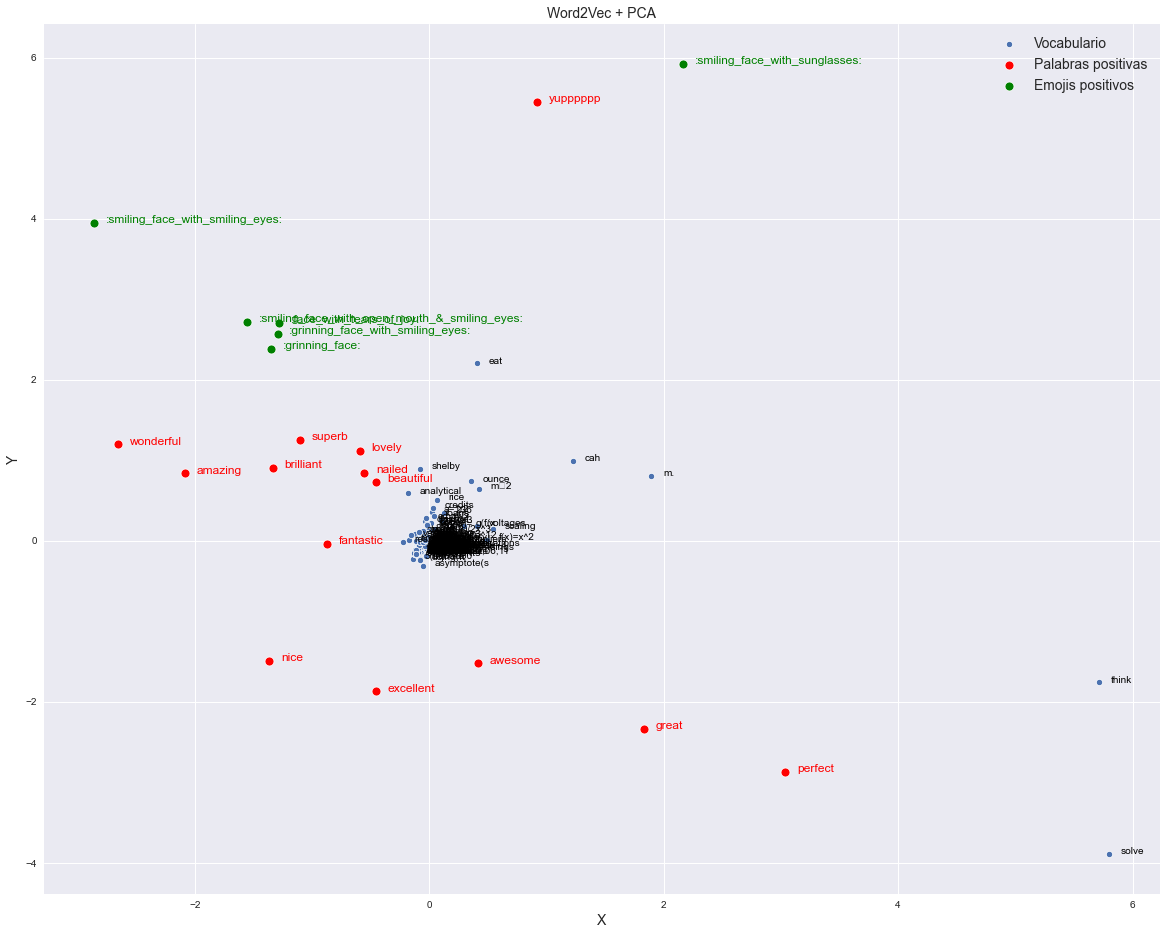

In [3]:
modelfile = '20201008-140336_model_100-5-1-0.bin'
model = Word2Vec.load(os.path.join('.', modelfile))

print(f'{bcolors.HEADER}{modelfile} - Tamaño del vocabulario {len(list(model.wv.vocab))}{bcolors.ENDC}')
print(f'{bcolors.OKGREEN}Primeras 50 compoentes del vocabulario{bcolors.ENDC}')
print(f'{bcolors.OKBLUE}{list(model.wv.vocab.keys())[0:50]}{bcolors.ENDC}')
print(f'{bcolors.OKGREEN}Ultimas 50 compoentes del vocabulario{bcolors.ENDC}')
print(f'{bcolors.OKBLUE}{list(model.wv.vocab.keys())[-50:]}{bcolors.ENDC}')
print(f'{bcolors.FAIL}#######################################{bcolors.ENDC}')


X = model[model.wv.vocab]
Xp = model[positives]
Xe = model[emojis]

pca = PCA(n_components=2)
result = pca.fit_transform(X)
resultp = pca.transform(Xp)
resulte = pca.transform(Xe)

# create a scatter plot of the projection
index = np.random.choice(range(0, result.shape[0]), Nsamples, replace=False)

plt.figure(figsize=(20,16))
p1 = sns.scatterplot(x=result[index, 0], y=result[index, 1], s=40, label='Vocabulario')
p2 = sns.scatterplot(x=resultp[:, 0], y=resultp[:, 1], s=80, color='red', label='Palabras positivas')
p3 = sns.scatterplot(x=resulte[:, 0], y=resulte[:, 1], s=80, color='green', label='Emojis positivos')

words = np.array(list(model.wv.vocab))[index]
result = result[index,:]
for i,word in enumerate(words):
    p1.text(result[i,0]+0.1, result[i,1], word,horizontalalignment='left', size='medium', color='black')#, weight='semibold')

for i,word in enumerate(positives):
    p2.text(resultp[i,0]+0.1, resultp[i,1], word,horizontalalignment='left', size='large', color='red')#, weight='semibold')
    
for i,word in enumerate(emojis):
    p2.text(resulte[i,0]+0.1, resulte[i,1], word,horizontalalignment='left', size='large', color='green')#, weight='semibold')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Word2Vec + PCA', fontsize=14)
plt.legend(fontsize=14)
sns.despine()

2020-10-08 14:33:17,790 : INFO : loading Word2Vec object from ./20201008-140436_model_100-5-100-0.bin
2020-10-08 14:33:17,944 : INFO : loading wv recursively from ./20201008-140436_model_100-5-100-0.bin.wv.* with mmap=None
2020-10-08 14:33:17,945 : INFO : setting ignored attribute vectors_norm to None
2020-10-08 14:33:17,946 : INFO : loading vocabulary recursively from ./20201008-140436_model_100-5-100-0.bin.vocabulary.* with mmap=None
2020-10-08 14:33:17,947 : INFO : loading trainables recursively from ./20201008-140436_model_100-5-100-0.bin.trainables.* with mmap=None
2020-10-08 14:33:17,951 : INFO : setting ignored attribute cum_table to None
2020-10-08 14:33:17,953 : INFO : loaded ./20201008-140436_model_100-5-100-0.bin
<ipython-input-4-16a85da35b08>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]
<ipython-input-4-16a85da35b08>:13: DeprecationWarning: Call to deprecated `__get

20201008-140436_model_100-5-100-0.bin - Tamaño del vocabulario 2591
Primeras 50 compoentes del vocabulario
['<url>', 'hey', '!', 'welcome', 'yup', '', 'looking', 'problem', "'ve", 'reviewed', 'finding', 'domain', 'square', 'root', 'function', 'let', "'s", 'work', 'together', 'find', 'exactly', "'re", 'stuck', 'tried', '?', 'simplifying', 'wrong', 'okay', 'actually', 'need', 'simplify', 'however', 'would', "n't", 'please', 'show', 'check', 'appreciate', 'seem', 'discuss', 'move', 'tell', 'mean', 'word', '"', 'meant', 'learned', 'far', 'x', 'good']
Ultimas 50 compoentes del vocabulario
['opens', 'neutrons', 'varma', 'pages', 'x/2', '):', 'electron', 'h+', 'ff', 'collinear', 'eliza', 'terminal', 'amber', 'bonds', 'ticket', 'tickets', 'bonding', 'delta', 'natalie', 'joe', 'breanna', 'f(1', 'molecule', 'pizza', 'matrices', 'oscar', 'wavelength', 'valence', 'slices', 'mackenzie', 'definite', 'yeap', 'index', 'riley', 'dipole', 'shinde', 'candaza', 'alonzo', 'okaye', 'dora', 'vavilakolanu', '

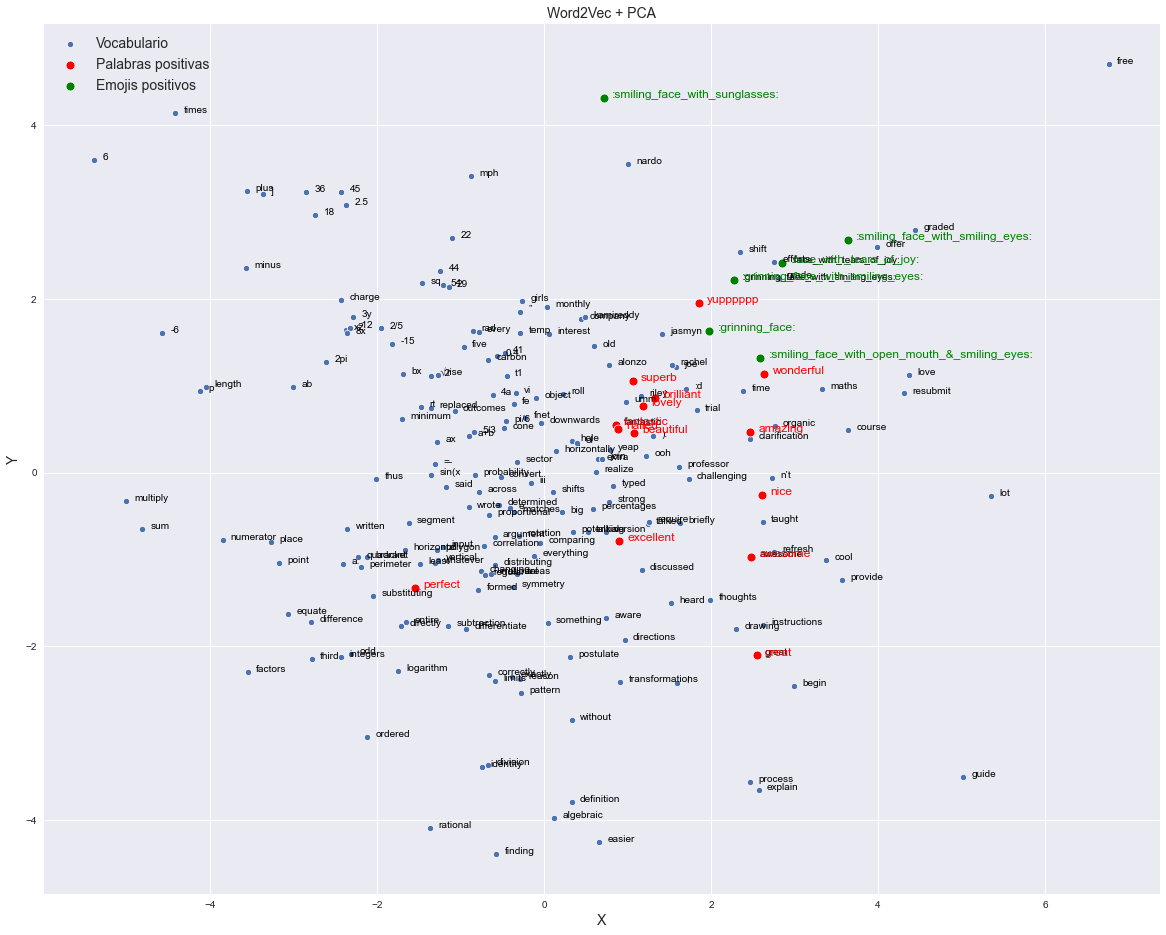

In [4]:
modelfile = '20201008-140436_model_100-5-100-0.bin'
model = Word2Vec.load(os.path.join('.', modelfile))

print(f'{bcolors.HEADER}{modelfile} - Tamaño del vocabulario {len(list(model.wv.vocab))}{bcolors.ENDC}')
print(f'{bcolors.OKGREEN}Primeras 50 compoentes del vocabulario{bcolors.ENDC}')
print(f'{bcolors.OKBLUE}{list(model.wv.vocab.keys())[0:50]}{bcolors.ENDC}')
print(f'{bcolors.OKGREEN}Ultimas 50 compoentes del vocabulario{bcolors.ENDC}')
print(f'{bcolors.OKBLUE}{list(model.wv.vocab.keys())[-50:]}{bcolors.ENDC}')
print(f'{bcolors.FAIL}#######################################{bcolors.ENDC}')


X = model[model.wv.vocab]
Xp = model[positives]
Xe = model[emojis]

pca = PCA(n_components=2)
result = pca.fit_transform(X)
resultp = pca.transform(Xp)
resulte = pca.transform(Xe)

# create a scatter plot of the projection
index = np.random.choice(range(0, result.shape[0]), Nsamples, replace=False)

plt.figure(figsize=(20,16))
p1 = sns.scatterplot(x=result[index, 0], y=result[index, 1], s=40, label='Vocabulario')
p2 = sns.scatterplot(x=resultp[:, 0], y=resultp[:, 1], s=80, color='red', label='Palabras positivas')
p3 = sns.scatterplot(x=resulte[:, 0], y=resulte[:, 1], s=80, color='green', label='Emojis positivos')

words = np.array(list(model.wv.vocab))[index]
result = result[index,:]
for i,word in enumerate(words):
    p1.text(result[i,0]+0.1, result[i,1], word,horizontalalignment='left', size='medium', color='black')#, weight='semibold')

for i,word in enumerate(positives):
    p2.text(resultp[i,0]+0.1, resultp[i,1], word,horizontalalignment='left', size='large', color='red')#, weight='semibold')
    
for i,word in enumerate(emojis):
    p2.text(resulte[i,0]+0.1, resulte[i,1], word,horizontalalignment='left', size='large', color='green')#, weight='semibold')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Word2Vec + PCA', fontsize=14)
plt.legend(fontsize=14)
sns.despine()

In [5]:
positives = ['great', 'excellent', 'nice', 'awesome', 'amazing', 'fantastic', 'wonderful', 'perfect', 'brilliant', 'superb','yupppppp'] #, 'nailed', 'lovely', 'beautiful'
emojis = [':smiling_face_with_smiling_eyes:', ':face_with_tears_of_joy:', ':smiling_face_with_sunglasses:',':smiling_face_with_open_mouth_&_smiling_eyes:']
#':grinning_face_with_smiling_eyes:',  ':grinning_face:',

2020-10-08 14:33:19,312 : INFO : loading Word2Vec object from ./20201008-140513_model_100-5-300-0.bin
2020-10-08 14:33:19,348 : INFO : loading wv recursively from ./20201008-140513_model_100-5-300-0.bin.wv.* with mmap=None
2020-10-08 14:33:19,349 : INFO : setting ignored attribute vectors_norm to None
2020-10-08 14:33:19,350 : INFO : loading vocabulary recursively from ./20201008-140513_model_100-5-300-0.bin.vocabulary.* with mmap=None
2020-10-08 14:33:19,353 : INFO : loading trainables recursively from ./20201008-140513_model_100-5-300-0.bin.trainables.* with mmap=None
2020-10-08 14:33:19,356 : INFO : setting ignored attribute cum_table to None
2020-10-08 14:33:19,358 : INFO : loaded ./20201008-140513_model_100-5-300-0.bin
<ipython-input-6-d9dd7b80e019>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]
<ipython-input-6-d9dd7b80e019>:13: DeprecationWarning: Call to deprecated `__get

20201008-140513_model_100-5-300-0.bin - Tamaño del vocabulario 1400
Primeras 50 compoentes del vocabulario
['<url>', 'hey', '!', 'welcome', 'yup', '', 'looking', 'problem', "'ve", 'reviewed', 'finding', 'domain', 'square', 'root', 'function', 'let', "'s", 'work', 'together', 'find', 'exactly', "'re", 'stuck', 'tried', '?', 'simplifying', 'wrong', 'okay', 'actually', 'need', 'simplify', 'however', 'would', "n't", 'please', 'show', 'check', 'appreciate', 'seem', 'discuss', 'move', 'tell', 'mean', 'word', '"', 'meant', 'learned', 'far', 'x', 'good']
Ultimas 50 compoentes del vocabulario
['leslie', 'block', 'forces', 'nguyen', 'covered', 'matrix', 'conjugate', 'radians', 'dy', 'dx', 'week', 'du', 'voltage', 'ms', 'charge', 'rt', 'bond', 'level', ':raising_hands:', 'reflection', 'anna', 'alexander', '…', 'nardo', 'mahato', 'ms.', ':folded_hands:', 'yupppppp', 'tips', 'dt', 'usha', 'sharma', ':smiling_face_with_sunglasses:', '¡', 'di', ':camera:', 'raman', 'pi/2', 'xymines', 'naw', 'woohoo',

/Users/pgianni/venv/diplo/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pgianni/venv/diplo/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0, flags=flags)


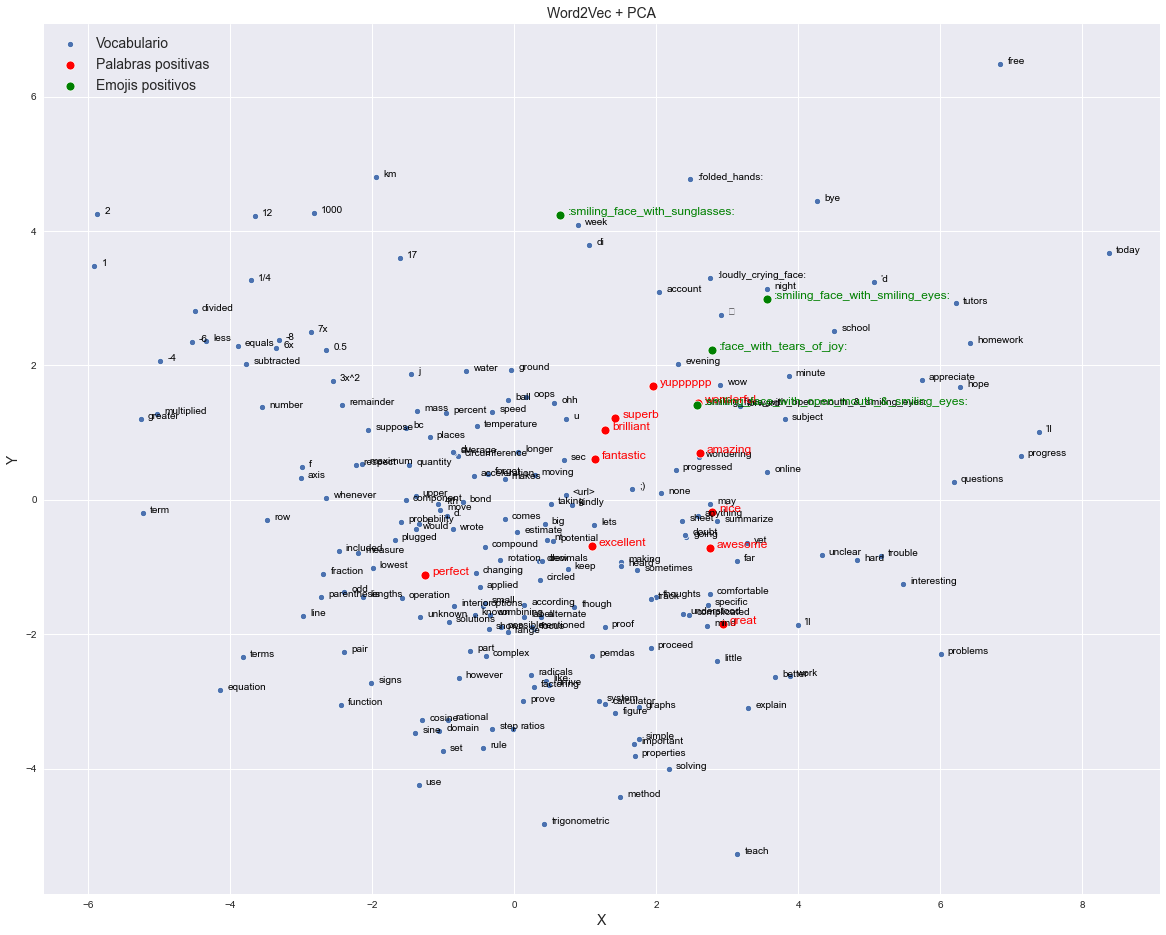

In [6]:
modelfile = '20201008-140513_model_100-5-300-0.bin'
model = Word2Vec.load(os.path.join('.', modelfile))

print(f'{bcolors.HEADER}{modelfile} - Tamaño del vocabulario {len(list(model.wv.vocab))}{bcolors.ENDC}')
print(f'{bcolors.OKGREEN}Primeras 50 compoentes del vocabulario{bcolors.ENDC}')
print(f'{bcolors.OKBLUE}{list(model.wv.vocab.keys())[0:50]}{bcolors.ENDC}')
print(f'{bcolors.OKGREEN}Ultimas 50 compoentes del vocabulario{bcolors.ENDC}')
print(f'{bcolors.OKBLUE}{list(model.wv.vocab.keys())[-50:]}{bcolors.ENDC}')
print(f'{bcolors.FAIL}#######################################{bcolors.ENDC}')


X = model[model.wv.vocab]
Xp = model[positives]
Xe = model[emojis]

pca = PCA(n_components=2)
result = pca.fit_transform(X)
resultp = pca.transform(Xp)
resulte = pca.transform(Xe)

# create a scatter plot of the projection
index = np.random.choice(range(0, result.shape[0]), Nsamples, replace=False)

plt.figure(figsize=(20,16))
p1 = sns.scatterplot(x=result[index, 0], y=result[index, 1], s=40, label='Vocabulario')
p2 = sns.scatterplot(x=resultp[:, 0], y=resultp[:, 1], s=80, color='red', label='Palabras positivas')
p3 = sns.scatterplot(x=resulte[:, 0], y=resulte[:, 1], s=80, color='green', label='Emojis positivos')

words = np.array(list(model.wv.vocab))[index]
result = result[index,:]
for i,word in enumerate(words):
    p1.text(result[i,0]+0.1, result[i,1], word,horizontalalignment='left', size='medium', color='black')#, weight='semibold')

for i,word in enumerate(positives):
    p2.text(resultp[i,0]+0.1, resultp[i,1], word,horizontalalignment='left', size='large', color='red')#, weight='semibold')
    
for i,word in enumerate(emojis):
    p2.text(resulte[i,0]+0.1, resulte[i,1], word,horizontalalignment='left', size='large', color='green')#, weight='semibold')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Word2Vec + PCA', fontsize=14)
plt.legend(fontsize=14)
sns.despine()

2020-10-08 14:33:20,618 : INFO : loading Word2Vec object from ./20201008-142337_model_100-1-300-0.bin
2020-10-08 14:33:20,653 : INFO : loading wv recursively from ./20201008-142337_model_100-1-300-0.bin.wv.* with mmap=None
2020-10-08 14:33:20,655 : INFO : setting ignored attribute vectors_norm to None
2020-10-08 14:33:20,657 : INFO : loading vocabulary recursively from ./20201008-142337_model_100-1-300-0.bin.vocabulary.* with mmap=None
2020-10-08 14:33:20,658 : INFO : loading trainables recursively from ./20201008-142337_model_100-1-300-0.bin.trainables.* with mmap=None
2020-10-08 14:33:20,660 : INFO : setting ignored attribute cum_table to None
2020-10-08 14:33:20,660 : INFO : loaded ./20201008-142337_model_100-1-300-0.bin
<ipython-input-7-686df9d1d75d>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]
<ipython-input-7-686df9d1d75d>:13: DeprecationWarning: Call to deprecated `__get

20201008-142337_model_100-1-300-0.bin - Tamaño del vocabulario 1400
Primeras 50 compoentes del vocabulario
['<url>', 'hey', '!', 'welcome', 'yup', '', 'looking', 'problem', "'ve", 'reviewed', 'finding', 'domain', 'square', 'root', 'function', 'let', "'s", 'work', 'together', 'find', 'exactly', "'re", 'stuck', 'tried', '?', 'simplifying', 'wrong', 'okay', 'actually', 'need', 'simplify', 'however', 'would', "n't", 'please', 'show', 'check', 'appreciate', 'seem', 'discuss', 'move', 'tell', 'mean', 'word', '"', 'meant', 'learned', 'far', 'x', 'good']
Ultimas 50 compoentes del vocabulario
['leslie', 'block', 'forces', 'nguyen', 'covered', 'matrix', 'conjugate', 'radians', 'dy', 'dx', 'week', 'du', 'voltage', 'ms', 'charge', 'rt', 'bond', 'level', ':raising_hands:', 'reflection', 'anna', 'alexander', '…', 'nardo', 'mahato', 'ms.', ':folded_hands:', 'yupppppp', 'tips', 'dt', 'usha', 'sharma', ':smiling_face_with_sunglasses:', '¡', 'di', ':camera:', 'raman', 'pi/2', 'xymines', 'naw', 'woohoo',

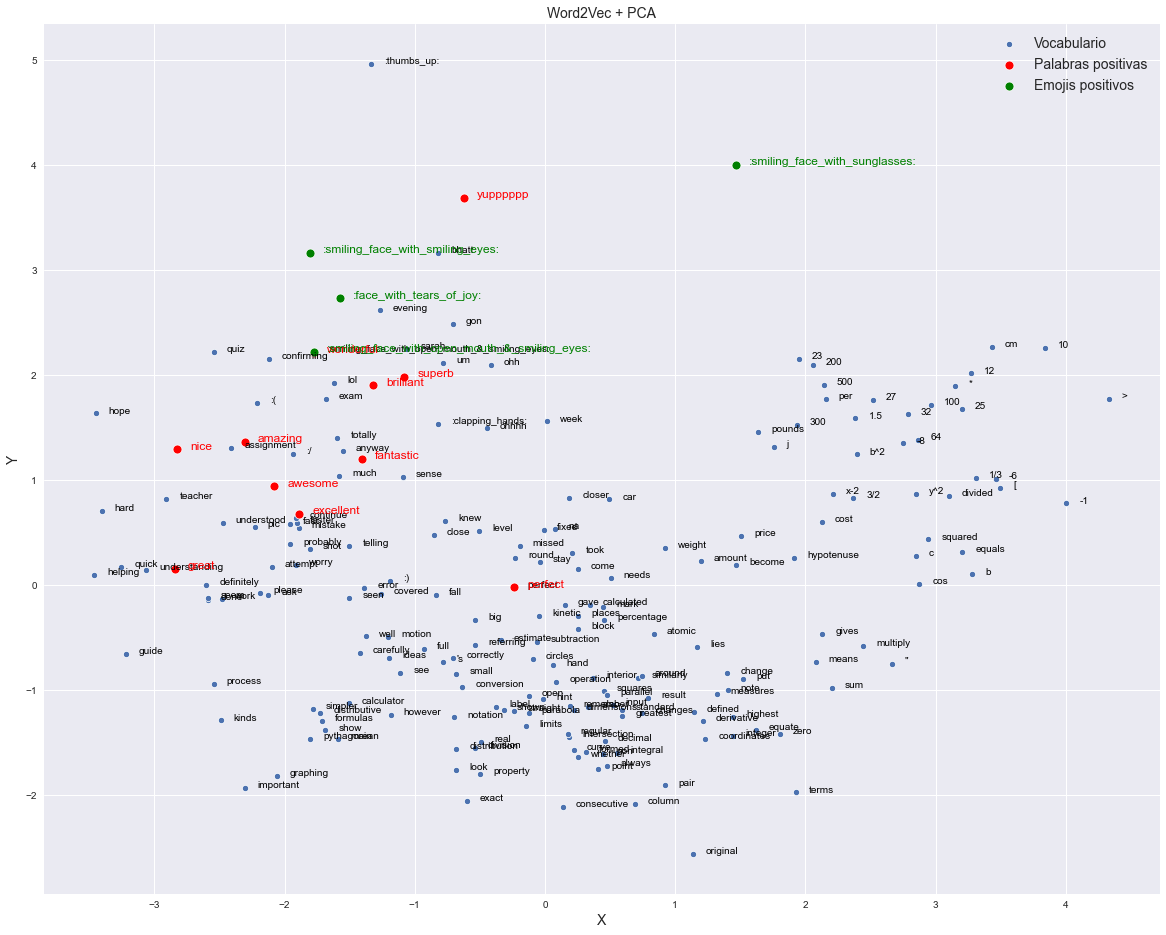

In [7]:
modelfile = '20201008-142337_model_100-1-300-0.bin'
model = Word2Vec.load(os.path.join('.', modelfile))

print(f'{bcolors.HEADER}{modelfile} - Tamaño del vocabulario {len(list(model.wv.vocab))}{bcolors.ENDC}')
print(f'{bcolors.OKGREEN}Primeras 50 compoentes del vocabulario{bcolors.ENDC}')
print(f'{bcolors.OKBLUE}{list(model.wv.vocab.keys())[0:50]}{bcolors.ENDC}')
print(f'{bcolors.OKGREEN}Ultimas 50 compoentes del vocabulario{bcolors.ENDC}')
print(f'{bcolors.OKBLUE}{list(model.wv.vocab.keys())[-50:]}{bcolors.ENDC}')
print(f'{bcolors.FAIL}#######################################{bcolors.ENDC}')


X = model[model.wv.vocab]
Xp = model[positives]
Xe = model[emojis]

pca = PCA(n_components=2)
result = pca.fit_transform(X)
resultp = pca.transform(Xp)
resulte = pca.transform(Xe)

# create a scatter plot of the projection
index = np.random.choice(range(0, result.shape[0]), Nsamples, replace=False)

plt.figure(figsize=(20,16))
p1 = sns.scatterplot(x=result[index, 0], y=result[index, 1], s=40, label='Vocabulario')
p2 = sns.scatterplot(x=resultp[:, 0], y=resultp[:, 1], s=80, color='red', label='Palabras positivas')
p3 = sns.scatterplot(x=resulte[:, 0], y=resulte[:, 1], s=80, color='green', label='Emojis positivos')

words = np.array(list(model.wv.vocab))[index]
result = result[index,:]
for i,word in enumerate(words):
    p1.text(result[i,0]+0.1, result[i,1], word,horizontalalignment='left', size='medium', color='black')#, weight='semibold')

for i,word in enumerate(positives):
    p2.text(resultp[i,0]+0.1, resultp[i,1], word,horizontalalignment='left', size='large', color='red')#, weight='semibold')
    
for i,word in enumerate(emojis):
    p2.text(resulte[i,0]+0.1, resulte[i,1], word,horizontalalignment='left', size='large', color='green')#, weight='semibold')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Word2Vec + PCA', fontsize=14)
plt.legend(fontsize=14)
sns.despine()